In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# --- 1. Prepare Unlabeled Data ---
# X: Input features (Customer Spending and Income)
X = np.array([
    [100, 50], [120, 60], [90, 45],  # Cluster 1: Low income/spending
    [300, 150], [320, 160], [280, 140], # Cluster 2: Medium
    [600, 300], [650, 350], [550, 280]  # Cluster 3: High
])

# Features must be scaled for K-Means to prevent features with larger values from dominating
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# --- 2. Train the Clustering Model ---
# Initialize the K-Means algorithm, asking it to find 3 clusters (K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Train the model (no 'y' target variable is provided, as the data is unlabeled)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)

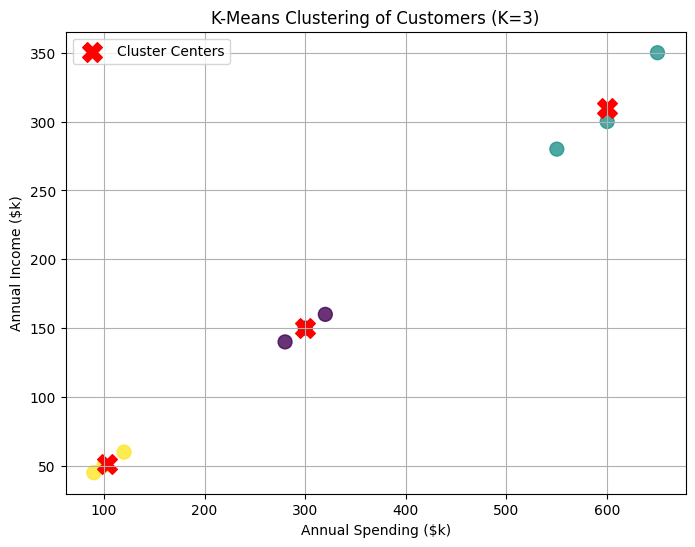

Assigned Cluster Labels: [2 2 2 0 0 0 1 1 1]

Cluster Centers (Spending, Income):
 [[300.         150.        ]
 [600.         310.        ]
 [103.33333333  51.66666667]]


In [4]:
# --- 3. Visualize the Clusters ---
plt.figure(figsize=(8, 6))
# Scatter plot the original data, colored by the assigned cluster label
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=100, alpha=0.8)
# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Cluster Centers')

plt.xlabel('Annual Spending ($k)')
plt.ylabel('Annual Income ($k)')
plt.title('K-Means Clustering of Customers (K=3)')
plt.legend()
plt.grid(True)
plt.show()

print("Assigned Cluster Labels:", cluster_labels)
print("\nCluster Centers (Spending, Income):\n", centers)